In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Resizing, Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

print("Sucess")

Sucess


In [4]:
IMAGE_SIZE = 256 
BATCH_SIZE = 32 
CHANNELS = 32
EPOCHS=50

In [22]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset",
    shuffle=True,
    image_size =(IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 10834 files belonging to 10 classes.


In [23]:
class_names = dataset.class_names
print("Class names:", class_names)

Class names: ['1. Eczema 1677', '10. Warts Molluscum and other Viral Infections - 2103', '2. Melanoma 15.75k', '3. Atopic Dermatitis - 1.25k', '5. Melanocytic Nevi (NV) - 7970', 'BA-impetigo', 'Gianotti-Crosti syndrome', 'Rashes in systemic diseases', 'VI-chickenpox', 'Vascular malformation']


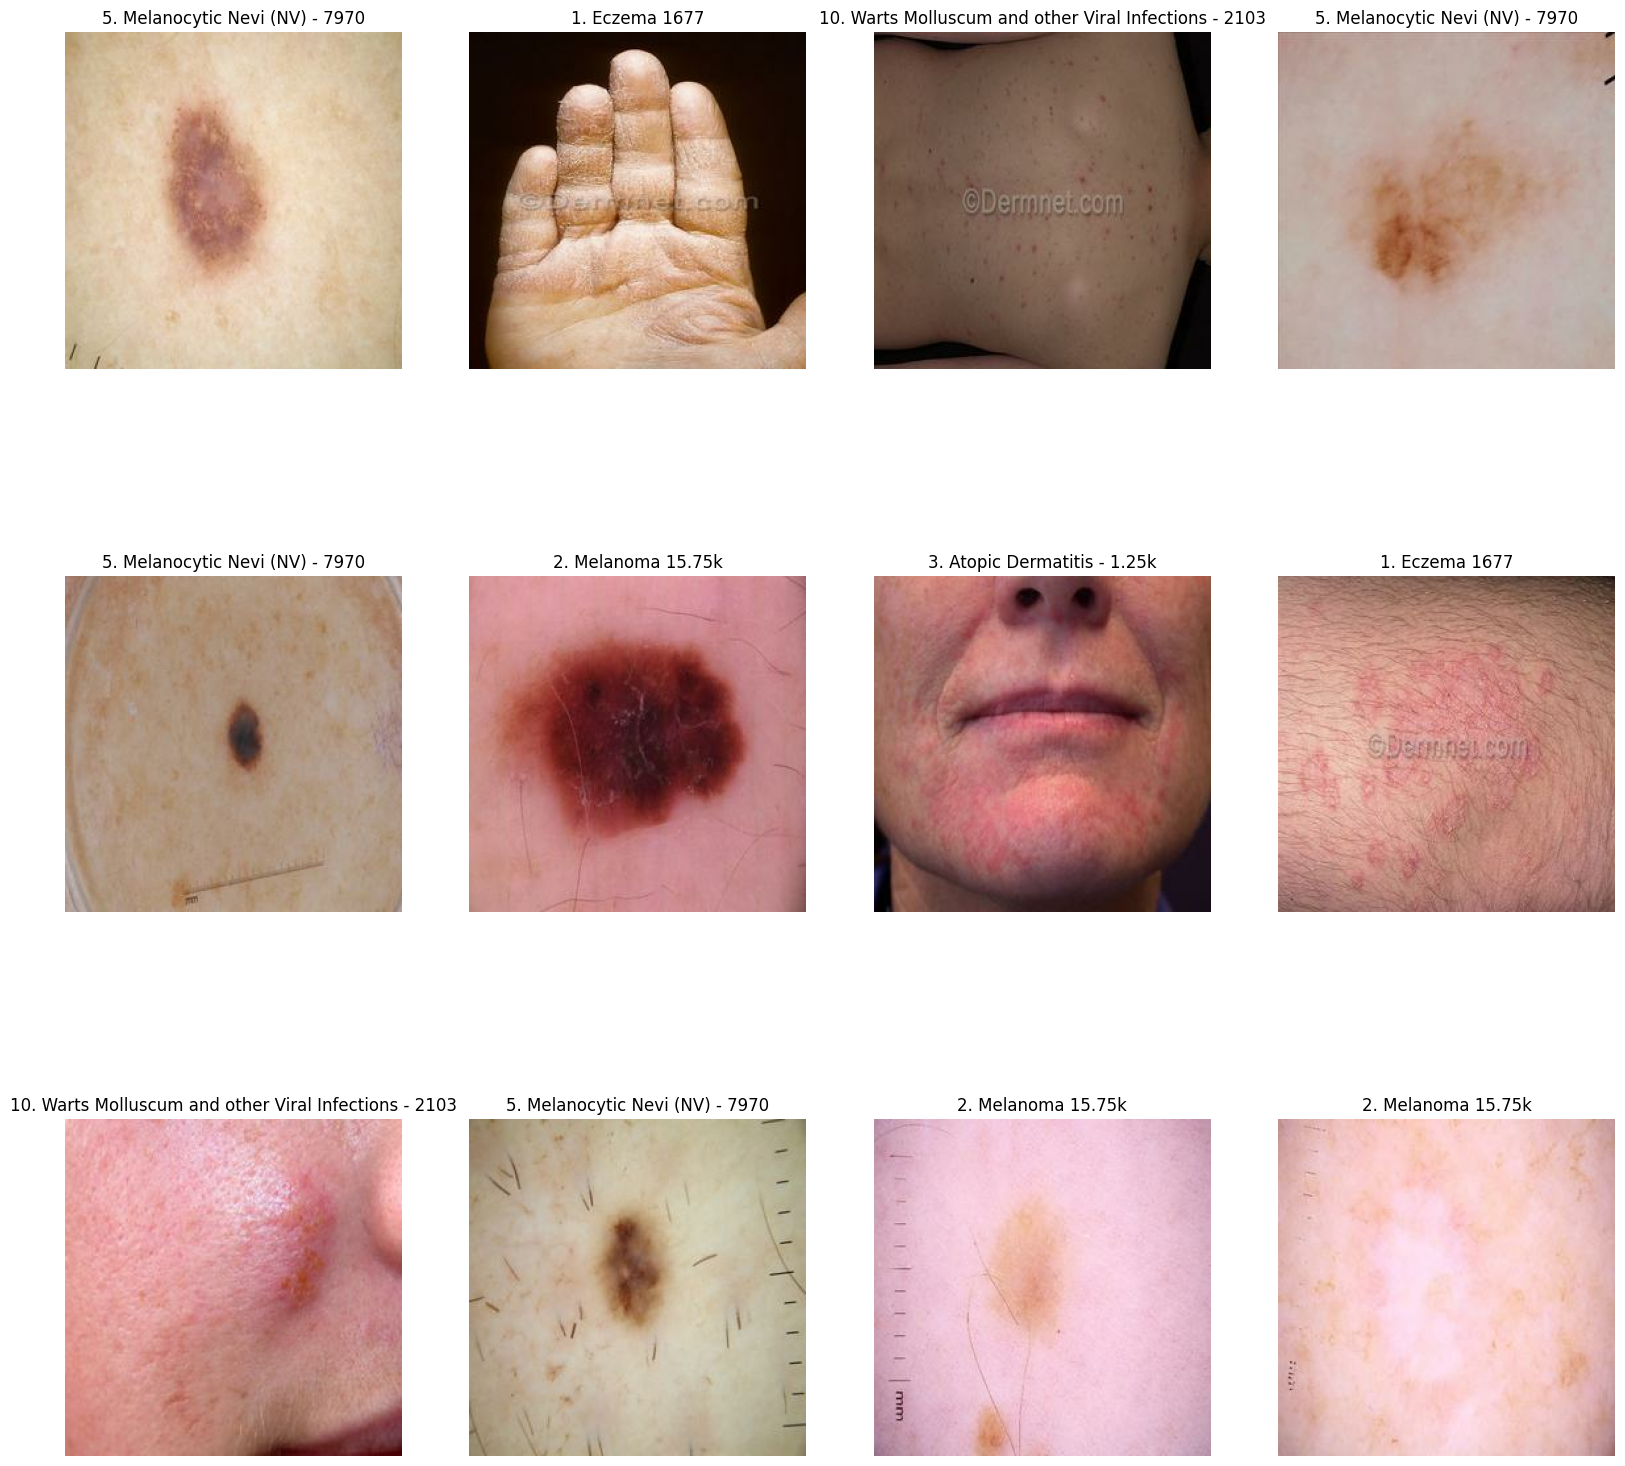

In [39]:
plt.figure(figsize=(20,20))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [40]:
len(dataset)

339

In [8]:
80% ==> training
20% ==> 10% validation, 10% test

SyntaxError: invalid syntax (829920516.py, line 1)

In [9]:
train_size =0.8
len(dataset)*train_size

271.2

In [10]:
train_ds = dataset.take(271)
len(train_ds)

271

In [11]:
test_ds = dataset.skip(271)
len(test_ds)

68

In [12]:
val_size=0.1 
len(dataset)*val_size

33.9

In [13]:
val_ds = test_ds.take(33)
len(val_ds)

33

In [14]:
test_ds = test_ds.skip(33)
len(test_ds)

35

In [15]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size)
    
    return train_ds, val_ds, test_ds

In [16]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [17]:
len(train_ds)

271

In [18]:
len(val_ds)

33

In [19]:
len(test_ds)

35

In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [26]:
resize_and_rescale = keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),  # Resize images to the specified size
    layers.Rescaling(1.0/255)  # Rescale pixel values to [0, 1] range
])

In [27]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])


In [68]:
input_shape = (None, IMAGE_SIZE, IMAGE_SIZE, 3)
n_classes = len(class_names)

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    # Removed input_shape parameter from Conv2D layers
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])
model.build(input_shape=(None, IMAGE_SIZE, IMAGE_SIZE, 3))


In [69]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 256, 256, None)    0         
                                                                 
 sequential_2 (Sequential)   (None, 256, 256, None)    0         
                                                                 
 conv2d_49 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_49 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_50 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_50 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                               

In [71]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [72]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds

)

Epoch 1/50
271/271 [==============================] - 329s 1s/step - loss: 1.5113 - accuracy: 0.3943 - val_loss: 1.2202 - val_accuracy: 0.5133
Epoch 2/50
271/271 [==============================] - 298s 1s/step - loss: 1.2495 - accuracy: 0.5012 - val_loss: 1.1778 - val_accuracy: 0.5095
Epoch 3/50
271/271 [==============================] - 250s 924ms/step - loss: 1.1652 - accuracy: 0.5293 - val_loss: 1.0750 - val_accuracy: 0.5663
Epoch 4/50
271/271 [==============================] - 273s 1s/step - loss: 1.1065 - accuracy: 0.5524 - val_loss: 0.9999 - val_accuracy: 0.6108
Epoch 5/50
271/271 [==============================] - 253s 935ms/step - loss: 1.0313 - accuracy: 0.5801 - val_loss: 0.9333 - val_accuracy: 0.6667
Epoch 6/50
271/271 [==============================] - 258s 952ms/step - loss: 0.9591 - accuracy: 0.6072 - val_loss: 0.9016 - val_accuracy: 0.6402
Epoch 7/50
271/271 [==============================] - 245s 902ms/step - loss: 0.9377 - accuracy: 0.6205 - val_loss: 0.9115 - val_accu

In [73]:
source = model.evaluate(train_ds)

271/271 [==============================] - 175s 641ms/step - loss: 0.6272 - accuracy: 0.7449


In [74]:
source

[0.62723708152771, 0.7449262142181396]

In [75]:
history

In [76]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 271}

In [77]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [78]:
history.history['accuracy']

[0.3942573666572571,
 0.5011531114578247,
 0.5292896628379822,
 0.5523523688316345,
 0.5801429748535156,
 0.607241690158844,
 0.620502769947052,
 0.624769389629364,
 0.6462177038192749,
 0.6542896628379822,
 0.6546356081962585,
 0.6567112803459167,
 0.6623616218566895,
 0.6684732437133789,
 0.6791974306106567,
 0.6734317541122437,
 0.6857702732086182,
 0.6934962868690491,
 0.6933810114860535,
 0.692227840423584,
 0.6925737857818604,
 0.7065267562866211,
 0.7044510841369629,
 0.7075645923614502,
 0.7106780409812927,
 0.7182887196540833,
 0.7186346650123596,
 0.7224400639533997,
 0.7249769568443298,
 0.7247462868690491,
 0.7254381775856018,
 0.7333948612213135,
 0.7353551387786865,
 0.7373154759407043,
 0.741466760635376,
 0.7436577677726746,
 0.7441189885139465,
 0.7485009431838989,
 0.7491928339004517,
 0.7483856081962585,
 0.7478090524673462,
 0.7440037131309509,
 0.7527675032615662,
 0.7625691890716553,
 0.7579566240310669,
 0.7638376355171204,
 0.7555350661277771,
 0.764529526233673

In [79]:
acc =  history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

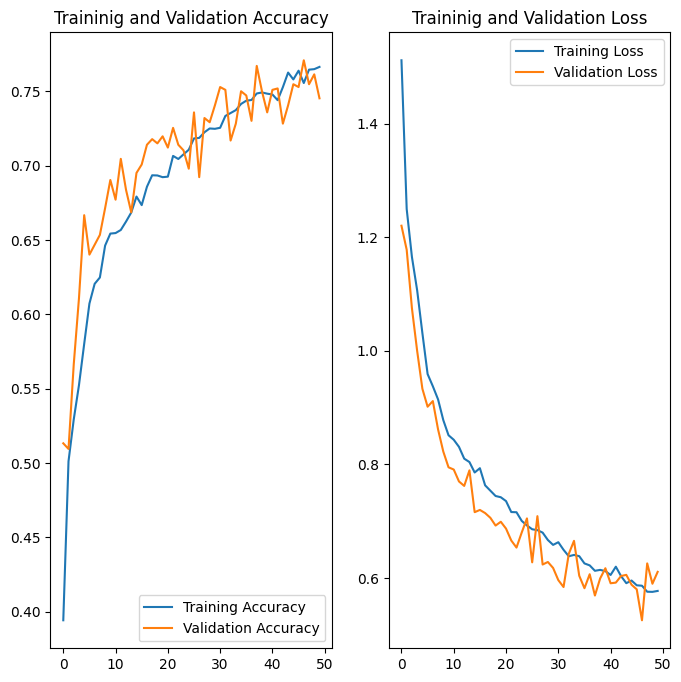

In [80]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Traininig and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Traininig and Validation Loss')
plt.show()

In [83]:
np.argmax([6.0626265e-02 ,4.3703997e-01, 3.7407421e-02, 3.9960021e-01, 5.9647460e-02,
 5.1034609e-04, 1.1847207e-03, 1.0226400e-05, 6.8500522e-05, 3.9049552e-03])

1

First image to predict
Actual label : 2. Melanoma 15.75k
1/1 [==============================] - 2s 2s/step
Predicted label: 2. Melanoma 15.75k


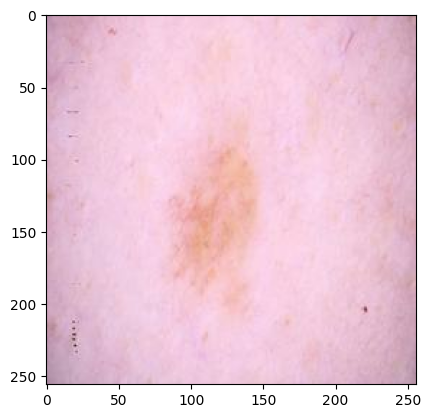

In [82]:
import numpy as np
for image_batch, labels_batch in test_ds.take(1):
    first_iamge = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("First image to predict")
    plt.imshow(first_iamge)
    print("Actual label :",class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print("Predicted label:",class_names[np.argmax(batch_prediction[0])])

In [84]:
def prediict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 *(np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 98ms/step


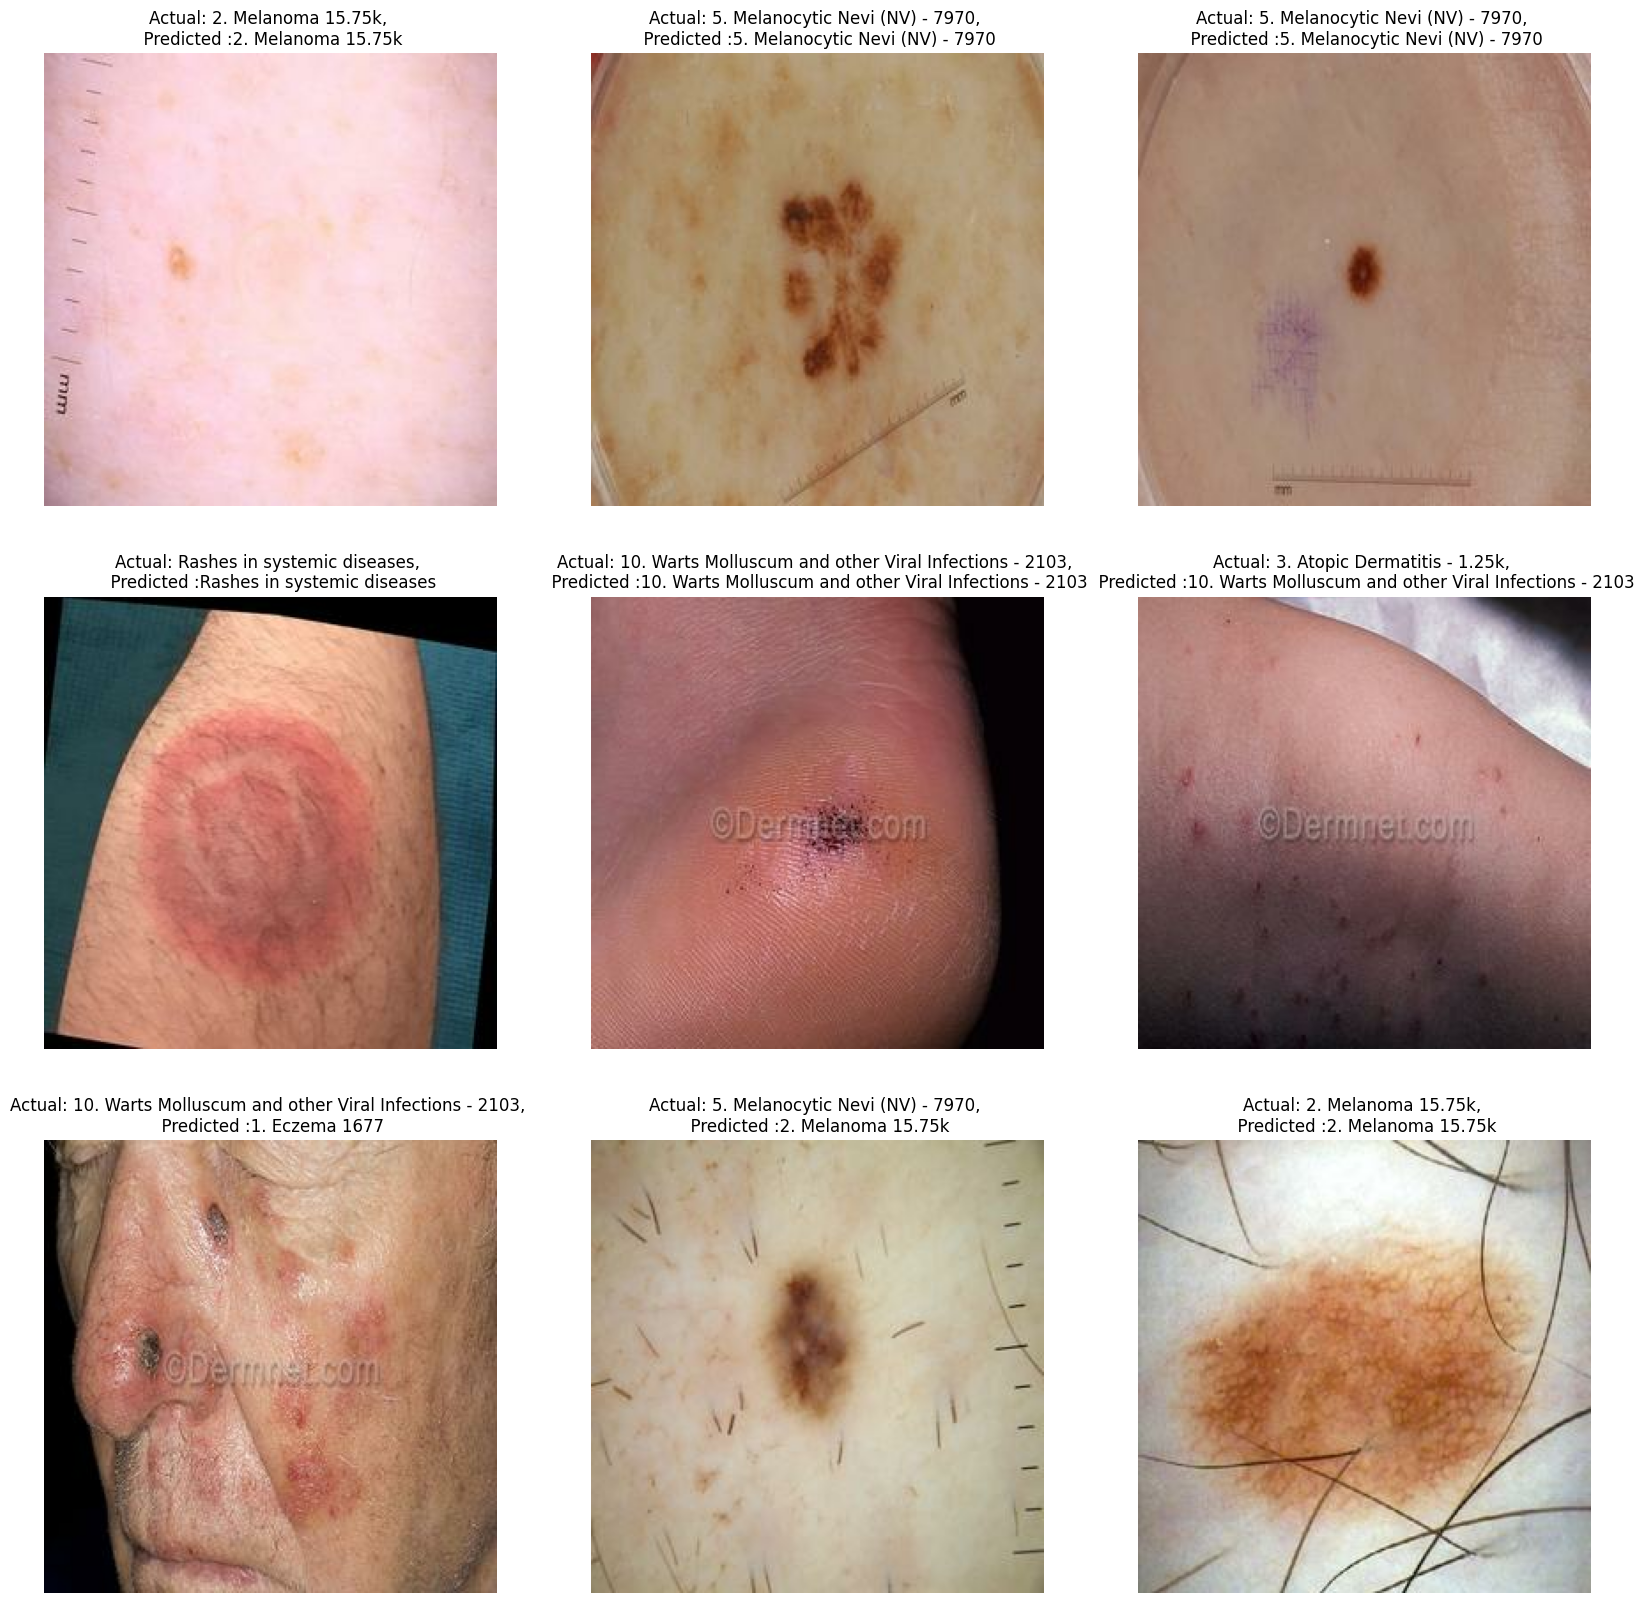

In [86]:
plt.figure(figsize=(20,20))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = prediict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class}, \n  Predicted :{predicted_class} ")
        plt.axis("off")

       

In [88]:
import os
model_version = max([int(i) for i in os.listdir('../models')+[0]])+1
model.save(f'../models/{model_version}')

INFO:tensorflow:Assets written to: ../models/3\assets


INFO:tensorflow:Assets written to: ../models/3\assets
